<a href="https://colab.research.google.com/github/edaasahiin/nutriScan/blob/main/dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving dataset1.zip to dataset1.zip


In [ ]:
import zipfile
import os


with zipfile.ZipFile("dataset1.zip", "r") as zip_ref:
    zip_ref.extractall("dataset1")

os.listdir("dataset1")


['en.openfoodfacts.org.products.tsv']

In [ ]:
import pandas as pd

file_path = "dataset1/en.openfoodfacts.org.products.tsv"
df = pd.read_csv(file_path, sep='\t', low_memory=False)

print("Veri seti boyutu:", df.shape)
df.head(3)


Veri seti boyutu: (356027, 163)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [ ]:

df_us = df[df['countries'].astype(str).str.contains("United States|USA|US|America", case=False, na=False)]

print("ABD ürün sayısı:", len(df_us))
df_us.head()


ABD ürün sayısı: 175179


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000016100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd


file_path = "dataset1/en.openfoodfacts.org.products.tsv"
df = pd.read_csv(file_path, sep='\t', low_memory=False)


df_us = df[df['countries'].astype(str).str.contains("United States|USA|US|America", case=False, na=False)]


df_us_ingredients = df_us[df_us['ingredients_text'].notna() & (df_us['ingredients_text'].str.strip() != '')]

print("ABD ürün sayısı:", len(df_us))
print("ingredients_text DOLU olan ABD ürün sayısı:", len(df_us_ingredients))
print("\n first 5 example rows:")
df_us_ingredients[['product_name', 'countries', 'ingredients_text']].head()


ABD ürün sayısı: 175179
ingredients_text DOLU olan ABD ürün sayısı: 172547

 first 5 example rows:


,product_name,countries,ingredients_text
1,Banana Chips Sweetened (Whole),US,"Bananas, vegetable oil (coconut oil, corn oil ..."
2,Peanuts,US,"Peanuts, wheat flour, sugar, rice flour, tapio..."
3,Organic Salted Nut Mix,US,"Organic hazelnuts, organic cashews, organic wa..."
4,Organic Polenta,US,Organic polenta
5,Breadshop Honey Gone Nuts Granola,US,"Rolled oats, grape concentrate, expeller press..."


In [ ]:
df.columns.tolist()


['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [ ]:
import pandas as pd


file_path = "dataset1/en.openfoodfacts.org.products.tsv"
df = pd.read_csv(file_path, sep='\t', low_memory=False)


df_us = df[df['countries'].astype(str).str.contains("United States|USA|US|America", case=False, na=False)]


df_us_ing_allergen = df_us[
    df_us['ingredients_text'].notna() & (df_us['ingredients_text'].str.strip() != '') &
    df_us['allergens_en'].notna() & (df_us['allergens_en'].str.strip() != '')
]

print("ABD ürün sayısı:", len(df_us))
print("ingredients_text + allergens_en DOLU olan ABD ürün sayısı:", len(df_us_ing_allergen))
print("\nİlk 5 örnek:")
df_us_ing_allergen[['product_name', 'countries', 'ingredients_text', 'allergens_en']].head()


ABD ürün sayısı: 175179
ingredients_text + allergens_en DOLU olan ABD ürün sayısı: 0

İlk 5 örnek:


,product_name,countries,ingredients_text,allergens_en


In [ ]:
import pandas as pd


file_path = "dataset1/en.openfoodfacts.org.products.tsv"
df = pd.read_csv(file_path, sep='\t', low_memory=False)


df_us = df[df['countries'].astype(str).str.contains("United States|USA|US|America", case=False, na=False)]


df_us_ing = df_us[df_us['ingredients_text'].notna() & (df_us['ingredients_text'].str.strip() != '')]

print("ABD ürün sayısı:", len(df_us))
print("Ingredients dolu olan ABD ürün sayısı:", len(df_us_ing))

selected_cols = [
    'product_name', 'countries', 'categories', 'ingredients_text', 'additives_tags',
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g',
    'salt_100g', 'proteins_100g', 'fiber_100g', 'carbohydrates_100g',
    'nutrition_grade_fr', 'nutrition-score-fr_100g'
]


df_us_ing = df_us_ing[[c for c in selected_cols if c in df_us_ing.columns]]

df_us_ing_sample = df_us_ing.sample(n=5000, random_state=42)

print("Random seçilen 5000 örnek:", df_us_ing_sample.shape)

df_us_ing_sample.head()



ABD ürün sayısı: 175179
Ingredients dolu olan ABD ürün sayısı: 172547
Random seçilen 5000 örnek: (5000, 15)


,product_name,countries,categories,ingredients_text,additives_tags,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,carbohydrates_100g,nutrition_grade_fr,nutrition-score-fr_100g
153253,Light Nonfat Yogurt,US,NaN,"Cultured grade a pasteurized nonfat milk, crys...","en:e202,en:e330,en:e331,en:e428,en:e955",247.0,0.00,0.00,6.47,0.18034,3.53,1.8,10.00,a,-3.0
119532,"Pluto's, Carib-B-Q Sauce, Hot",US,NaN,"All-natural ingredients: water, apple cider vi...",en:e415,418.0,0.00,0.00,23.33,3.63982,0.00,0.0,23.33,d,16.0
124071,Herring Fillet,US,NaN,"Herring, real sour cream (whole milk, cream, m...",NaN,732.0,7.89,3.51,10.53,1.33604,10.53,0.0,12.28,d,12.0
14259,Smoked Ham & Swiss,US,NaN,"Smoked ham (cured with: water, salt, maple syr...","en:e101,en:e101i,en:e250,en:e339",858.0,6.41,3.21,5.13,1.80848,14.10,1.3,21.15,d,12.0
150148,"Yellowfin Marinated Tuna, Roasted Garlic In Ex...",US,NaN,"Yellowfin tuna, extra virgin olive oil, water,...",NaN,1046.0,17.86,2.68,NaN,1.13284,21.43,0.0,0.00,NaN,NaN


In [ ]:
df_us_ing_sample.to_csv("us_5000_with_ingredients_selected_columns.csv", index=False)

from google.colab import files
files.download("us_5000_with_ingredients_selected_columns.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd


df = pd.read_csv("us_5000_with_ingredients_selected_columns.csv")


df.head()


,product_name,countries,categories,ingredients_text,additives_tags,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,carbohydrates_100g,nutrition_grade_fr,nutrition-score-fr_100g
0,Light Nonfat Yogurt,US,NaN,"Cultured grade a pasteurized nonfat milk, crys...","en:e202,en:e330,en:e331,en:e428,en:e955",247.0,0.00,0.00,6.47,0.18034,3.53,1.8,10.00,a,-3.0
1,"Pluto's, Carib-B-Q Sauce, Hot",US,NaN,"All-natural ingredients: water, apple cider vi...",en:e415,418.0,0.00,0.00,23.33,3.63982,0.00,0.0,23.33,d,16.0
2,Herring Fillet,US,NaN,"Herring, real sour cream (whole milk, cream, m...",NaN,732.0,7.89,3.51,10.53,1.33604,10.53,0.0,12.28,d,12.0
3,Smoked Ham & Swiss,US,NaN,"Smoked ham (cured with: water, salt, maple syr...","en:e101,en:e101i,en:e250,en:e339",858.0,6.41,3.21,5.13,1.80848,14.10,1.3,21.15,d,12.0
4,"Yellowfin Marinated Tuna, Roasted Garlic In Ex...",US,NaN,"Yellowfin tuna, extra virgin olive oil, water,...",NaN,1046.0,17.86,2.68,NaN,1.13284,21.43,0.0,0.00,NaN,NaN


In [ ]:

df.info()


df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             4998 non-null   object 
 1   countries                5000 non-null   object 
 2   categories               83 non-null     object 
 3   ingredients_text         5000 non-null   object 
 4   additives_tags           3319 non-null   object 
 5   energy_100g              4966 non-null   float64
 6   fat_100g                 4970 non-null   float64
 7   saturated-fat_100g       4221 non-null   float64
 8   sugars_100g              4636 non-null   float64
 9   salt_100g                4962 non-null   float64
 10  proteins_100g            4955 non-null   float64
 11  fiber_100g               4035 non-null   float64
 12  carbohydrates_100g       4979 non-null   float64
 13  nutrition_grade_fr       4026 non-null   object 
 14  nutrition-score-fr_100g 

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,carbohydrates_100g,nutrition-score-fr_100g
count,4966.000000,4970.000000,4221.000000,4636.000000,4962.000000,4955.000000,4035.000000,4979.000000,4026.000000
mean,1138.911116,12.460576,4.882267,17.449909,1.709806,6.778747,2.797217,34.080701,9.514158
std,807.606489,17.701237,7.579462,22.204721,5.775072,8.160192,4.562766,29.801999,8.974715
min,0.000000,0.000000,0.000000,-6.670000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,372.000000,0.000000,0.000000,1.720000,0.063500,0.000000,0.000000,6.670000,1.000000
50%,1165.000000,4.350000,1.790000,6.670000,0.635000,4.000000,1.400000,24.460000,10.000000
75%,1674.000000,20.000000,7.140000,26.670000,1.457325,10.000000,3.600000,60.710000,16.000000
max,8523.000000,100.000000,90.000000,100.000000,97.873820,66.670000,87.000000,100.000000,35.000000


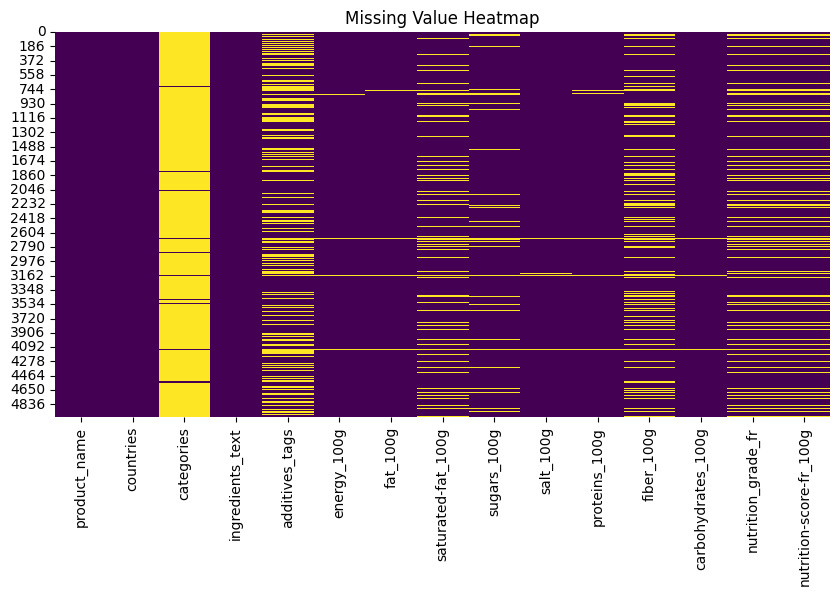

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


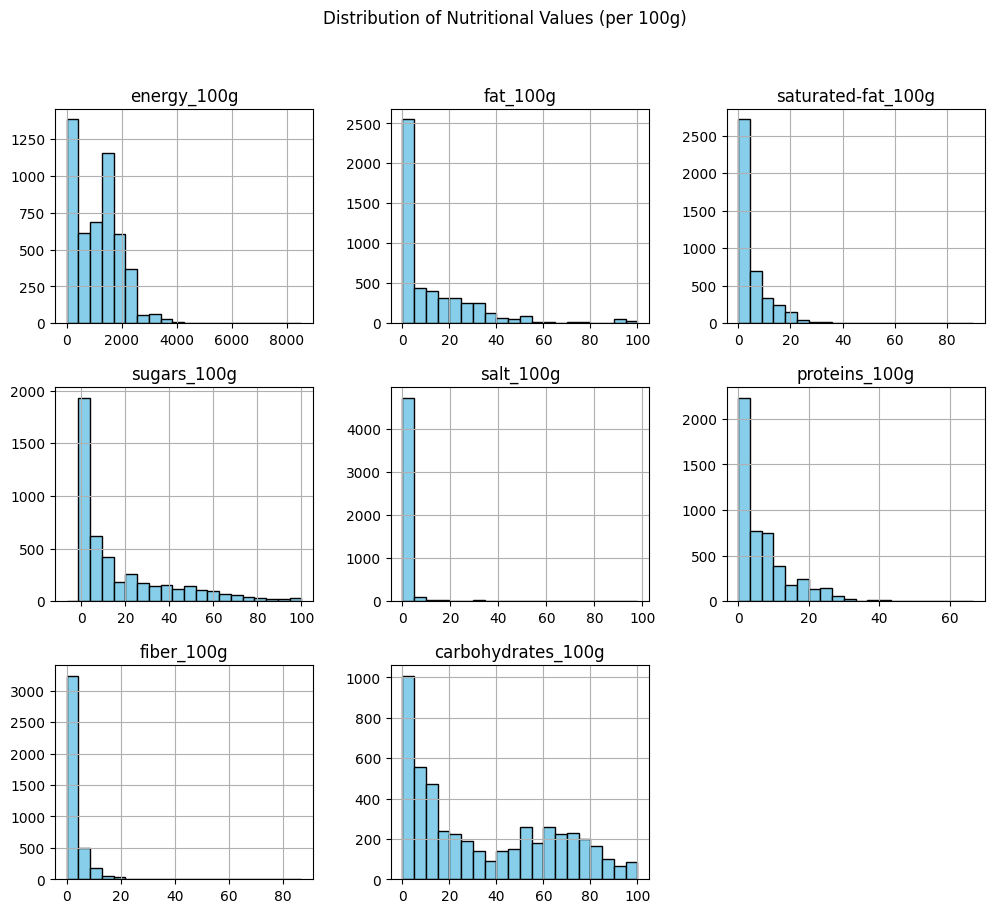

In [ ]:
numeric_cols = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'sugars_100g', 'salt_100g', 'proteins_100g',
    'fiber_100g', 'carbohydrates_100g'
]

df[numeric_cols].hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Nutritional Values (per 100g)")
plt.show()


/tmp/ipython-input-288465234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nutrition_grade_fr', data=df, palette='Set2')


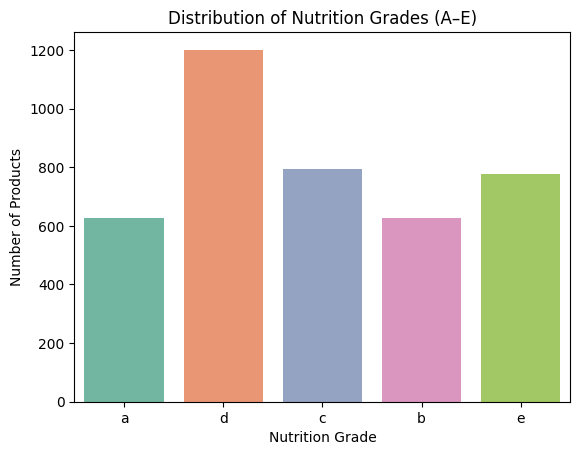

In [ ]:
sns.countplot(x='nutrition_grade_fr', data=df, palette='Set2')
plt.title("Distribution of Nutrition Grades (A–E)")
plt.xlabel("Nutrition Grade")
plt.ylabel("Number of Products")
plt.show()


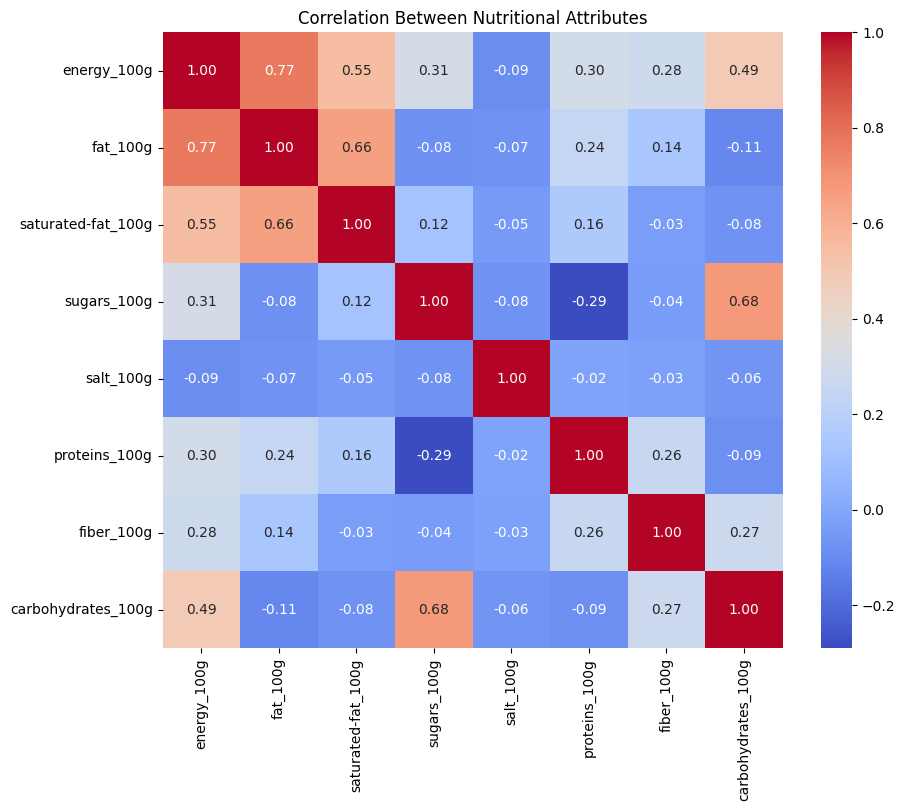

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Nutritional Attributes")
plt.show()


/tmp/ipython-input-2819603312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[a[0] for a in common], x=[a[1] for a in common], palette='viridis')


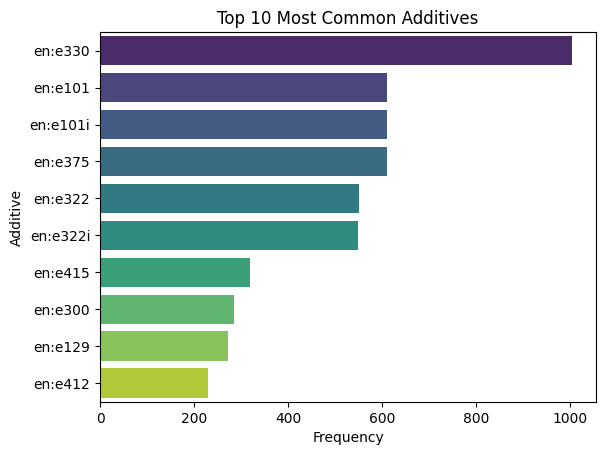

In [ ]:
from collections import Counter
import itertools

additives = df['additives_tags'].dropna().astype(str).str.split(',')
flat = list(itertools.chain.from_iterable(additives))
common = Counter(flat).most_common(10)

sns.barplot(y=[a[0] for a in common], x=[a[1] for a in common], palette='viridis')
plt.title("Top 10 Most Common Additives")
plt.xlabel("Frequency")
plt.ylabel("Additive")
plt.show()


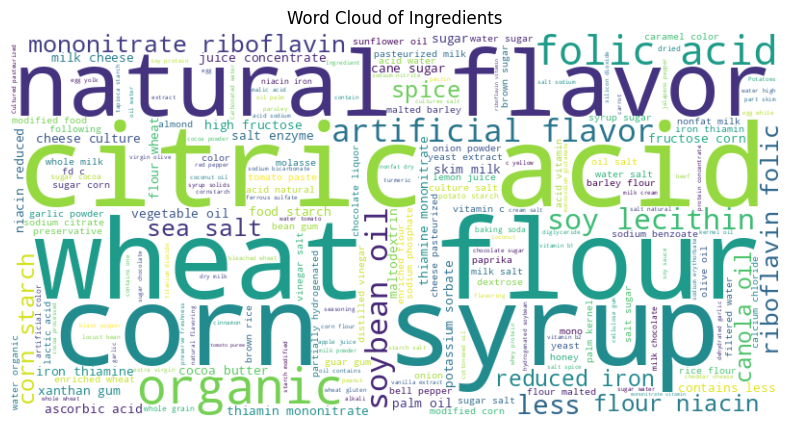

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['ingredients_text'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Ingredients")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving nutrients_csvfile.csv to nutrients_csvfile.csv


In [ ]:
import pandas as pd

PATH = "nutrients_csvfile.csv"
df = pd.read_csv(PATH, sep=";", skiprows=1, engine="python")

df.head(), df.shape


(                                        product_name countries categories  \
 0                                Light Nonfat Yogurt        US        NaN   
 1                      Pluto's, Carib-B-Q Sauce, Hot        US        NaN   
 2                                     Herring Fillet        US        NaN   
 3                                 Smoked Ham & Swiss        US        NaN   
 4  Yellowfin Marinated Tuna, Roasted Garlic In Ex...        US        NaN   
 
                                     ingredients_text  \
 0  Cultured grade a pasteurized nonfat milk, crys...   
 1  All-natural ingredients: water, apple cider vi...   
 2  Herring, real sour cream (whole milk, cream, m...   
 3  Smoked ham (cured with: water, salt, maple syr...   
 4  Yellowfin tuna, extra virgin olive oil, water,...   
 
                             additives_tags  energy_100g  fat_100g  \
 0  en:e202,en:e330,en:e331,en:e428,en:e955        247.0      0.00   
 1                                  en:e415   

In [ ]:
import numpy as np

num_features = [
    "energy_100g","fat_100g","saturated-fat_100g","sugars_100g",
    "salt_100g","proteins_100g","fiber_100g","carbohydrates_100g"
]
target = "nutrition_grade_fr"

df_labeled = df.dropna(subset=[target]).copy()

X = df_labeled[num_features]
y = df_labeled[target].astype(str)

print("Raw rows:", len(df))
print("Labeled rows:", len(df_labeled))
print(y.value_counts().sort_index())


Raw rows: 5000
Labeled rows: 4026
nutrition_grade_fr
a     628
b     626
c     795
d    1201
e     776
Name: count, dtype: int64


In [ ]:
desc = X.describe().T
desc


,count,mean,std,min,25%,50%,75%,max
energy_100g,4023.0,1206.903306,736.928948,0.0,494.00000,1276.00000,1715.00000,3887.0
fat_100g,4017.0,13.311317,20.591900,0.0,0.80000,7.23000,21.43000,885.0
saturated-fat_100g,4023.0,4.789801,11.680050,0.0,0.00000,1.67000,6.72500,442.0
sugars_100g,4023.0,15.906455,20.261926,0.0,1.64000,6.00000,25.00000,100.0
salt_100g,4023.0,16.823938,92.889829,0.0,0.14732,0.83312,1.63322,901.0
proteins_100g,4023.0,8.089244,15.378430,0.0,2.01500,5.56000,10.71000,833.0
fiber_100g,3889.0,3.294276,18.810814,0.0,0.00000,1.40000,3.60000,833.0
carbohydrates_100g,4021.0,35.979838,28.581044,0.0,8.75000,29.41000,61.22000,100.0


from matplotlib import pyplot as plt
_df_21['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='std', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('min', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('min', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('min', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('min', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_34['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='mean', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='std', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='25%', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

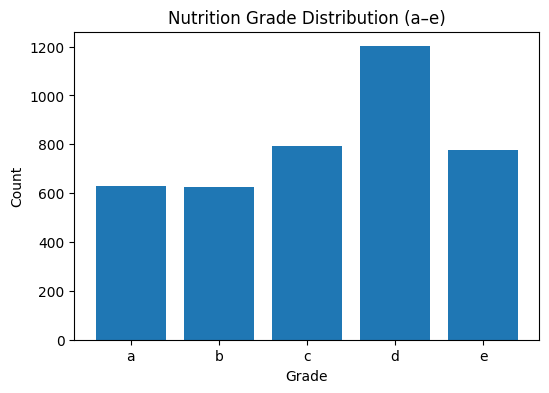

In [ ]:
import matplotlib.pyplot as plt

counts = y.value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Nutrition Grade Distribution (a–e)")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()


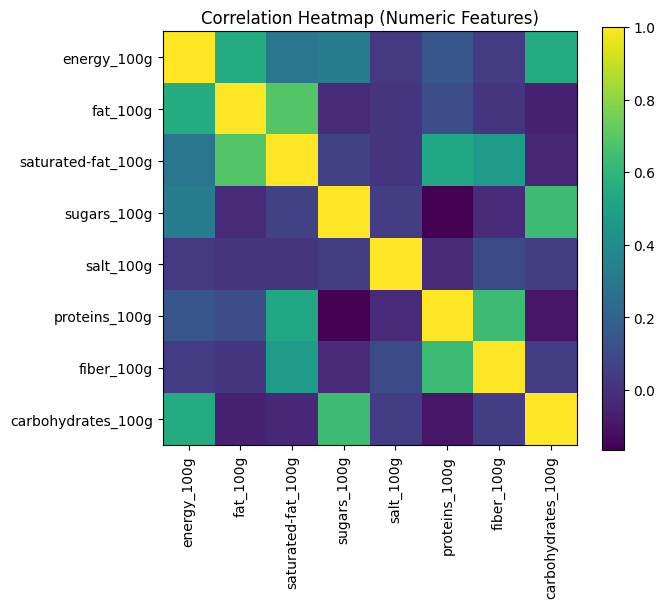

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

corr = X.corr()

plt.figure(figsize=(7,6))
plt.imshow(corr.values)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric Features)")
plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

prep_scale = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

prep_noscale = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

models = {
    "Model 1 – Logistic Regression": Pipeline([
        ("prep", prep_scale),
        ("clf", LogisticRegression(max_iter=5000, multi_class="multinomial"))
    ]),
    "Model 2 – Decision Tree": Pipeline([
        ("prep", prep_noscale),
        ("clf", DecisionTreeClassifier(random_state=42))
    ]),
    "Model 3 – KNN (k=15)": Pipeline([
        ("prep", prep_scale),
        ("clf", KNeighborsClassifier(n_neighbors=15))
    ]),
    "Model 4 – Random Forest": Pipeline([
        ("prep", prep_noscale),
        ("clf", RandomForestClassifier(random_state=42, n_estimators=300, n_jobs=-1))
    ]),
    "Model 5 – Gradient Boosting": Pipeline([
        ("prep", prep_noscale),
        ("clf", GradientBoostingClassifier(random_state=42))
    ]),
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

rows = []
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision (macro)": precision_score(y_test, pred, average="macro", zero_division=0),
        "Recall (macro)": recall_score(y_test, pred, average="macro", zero_division=0),
        "F1 (macro)": f1_score(y_test, pred, average="macro", zero_division=0),
    })

metrics_df = pd.DataFrame(rows).sort_values("F1 (macro)", ascending=False)
metrics_df


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Model,Accuracy,Precision (macro),Recall (macro),F1 (macro)
3,Model 4 – Random Forest,0.857320,0.859761,0.852089,0.854082
4,Model 5 – Gradient Boosting,0.851117,0.853061,0.845727,0.847409
1,Model 2 – Decision Tree,0.818859,0.820349,0.822874,0.820814
2,Model 3 – KNN (k=15),0.667494,0.666840,0.664205,0.658660
0,Model 1 – Logistic Regression,0.629032,0.622806,0.608169,0.606243


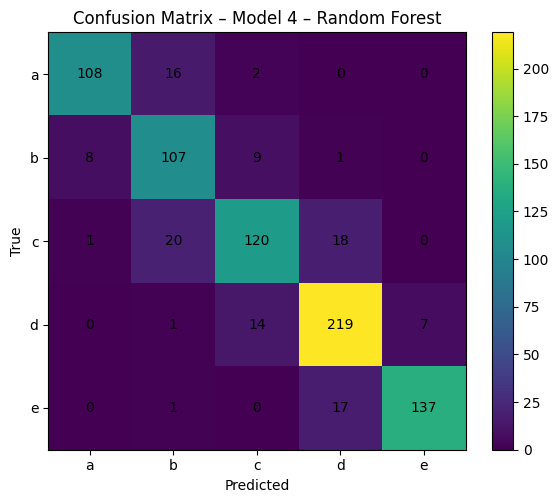

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

best_name = metrics_df.iloc[0]["Model"]
best_model = models[best_name]
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

labels = ["a","b","c","d","e"]
cm = confusion_matrix(y_test, pred, labels=labels)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
plt.title(f"Confusion Matrix – {best_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()


,Feature,RF Importance,GB Importance
4,salt_100g,0.176590,0.197914
2,saturated-fat_100g,0.171272,0.315389
0,energy_100g,0.131165,0.181636
3,sugars_100g,0.125673,0.127849
6,fiber_100g,0.109191,0.092758
1,fat_100g,0.108002,0.013998
7,carbohydrates_100g,0.090070,0.025861
5,proteins_100g,0.088035,0.044595


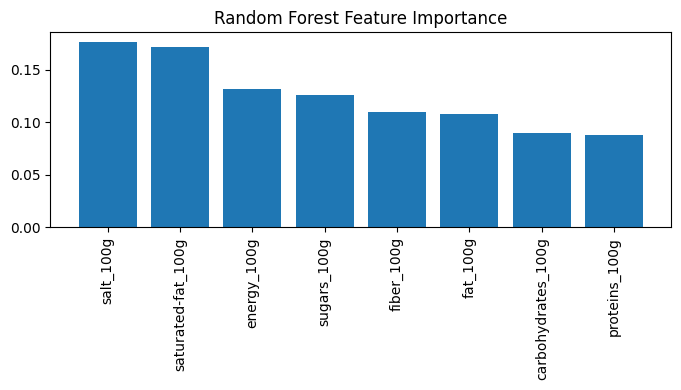

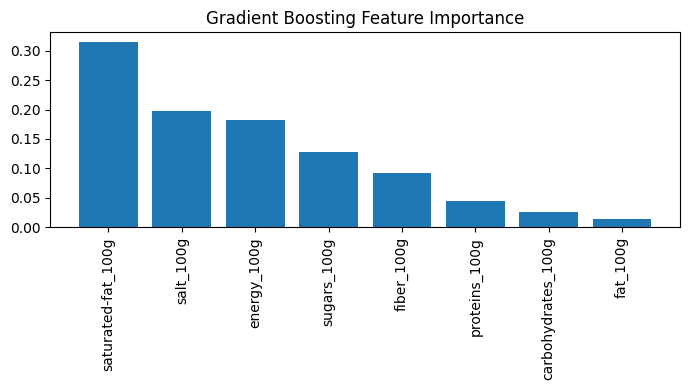

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


rf = models["Model 4 – Random Forest"]
gb = models["Model 5 – Gradient Boosting"]

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

rf_imp = rf.named_steps["clf"].feature_importances_
gb_imp = gb.named_steps["clf"].feature_importances_

imp_df = pd.DataFrame({
    "Feature": num_features,
    "RF Importance": rf_imp,
    "GB Importance": gb_imp
}).sort_values("RF Importance", ascending=False)

display(imp_df)


plt.figure(figsize=(7,4))
plt.bar(imp_df["Feature"], imp_df["RF Importance"])
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


imp_df2 = imp_df.sort_values("GB Importance", ascending=False)
plt.figure(figsize=(7,4))
plt.bar(imp_df2["Feature"], imp_df2["GB Importance"])
plt.title("Gradient Boosting Feature Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

rf_base = Pipeline([
    ("prep", prep_noscale),
    ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid = {
    "clf__n_estimators": [200, 300, 500],
    "clf__max_depth": [None, 20, 30],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2],
    "clf__max_features": ["sqrt"],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(
    rf_base,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV f1_macro:", grid.best_score_)

tuned_rf = grid.best_estimator_
pred = tuned_rf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Test Accuracy:", accuracy_score(y_test, pred))
print("Test Macro F1:", f1_score(y_test, pred, average="macro"))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best params: {'clf__max_depth': 20, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best CV f1_macro: 0.8445334006578782
Test Accuracy: 0.8598014888337469
Test Macro F1: 0.8562233423999761


In [ ]:
!pip -q install shap


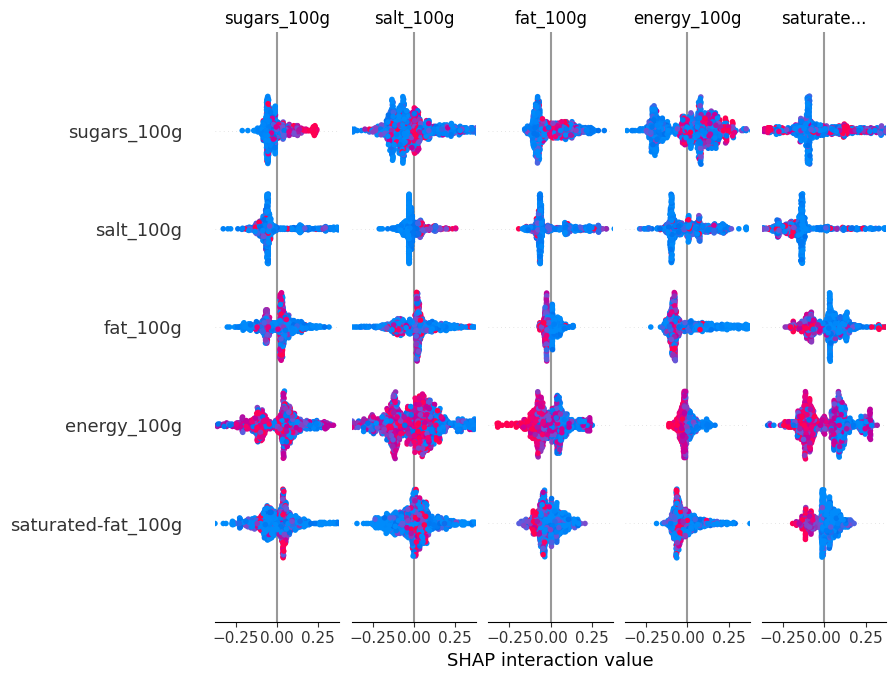

In [ ]:
import shap
import pandas as pd

model = tuned_rf
imputer = model.named_steps["prep"].named_steps["imputer"] if "prep" in model.named_steps else model.named_steps["imputer"]
clf = model.named_steps["clf"] if "clf" in model.named_steps else model.named_steps["model"]

X_train_imp = pd.DataFrame(imputer.transform(X_train), columns=num_features)
X_test_imp  = pd.DataFrame(imputer.transform(X_test), columns=num_features)

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_imp)

shap.summary_plot(shap_values, X_test_imp, feature_names=num_features)


In [ ]:
df_clean = df.dropna(subset=["nutrition_grade_fr"]).copy()


In [ ]:
import pandas as pd
import numpy as np

col_names = [
    "product_name", "countries", "categories", "ingredients_text", "additives_tags",
    "energy_100g", "fat_100g", "saturated-fat_100g", "sugars_100g", "salt_100g",
    "proteins_100g", "fiber_100g", "carbohydrates_100g", "nutrition_grade_fr",
    "nutrition-score-fr_100g"
]

df = pd.read_csv(
    "nutrients_csvfile.csv",
    sep=";",
    engine="python",
    on_bad_lines="skip",
    header=None,
    names=col_names,
    skiprows=1
)

df = df.dropna(subset=["nutrition_grade_fr"]).copy()
df.head(), df.shape


(                    product_name  countries  categories  \
 0                   product_name  countries  categories   
 1            Light Nonfat Yogurt         US         NaN   
 2  Pluto's, Carib-B-Q Sauce, Hot         US         NaN   
 3                 Herring Fillet         US         NaN   
 4             Smoked Ham & Swiss         US         NaN   
 
                                     ingredients_text  \
 0                                   ingredients_text   
 1  Cultured grade a pasteurized nonfat milk, crys...   
 2  All-natural ingredients: water, apple cider vi...   
 3  Herring, real sour cream (whole milk, cream, m...   
 4  Smoked ham (cured with: water, salt, maple syr...   
 
                             additives_tags  energy_100g  fat_100g  \
 0                           additives_tags  energy_100g  fat_100g   
 1  en:e202,en:e330,en:e331,en:e428,en:e955        247.0       0.0   
 2                                  en:e415        418.0       0.0   
 3            

In [ ]:
num_cols = ["energy_100g","fat_100g","saturated-fat_100g","sugars_100g","salt_100g",
            "proteins_100g","fiber_100g","carbohydrates_100g"]

df[num_cols] = df[num_cols].apply(lambda s: pd.to_numeric(s.astype(str).str.replace(",", "."), errors="coerce"))


,count,mean,std,min,25%,50%,75%,max
energy_100g,4023.0,1206.903306,736.928948,0.0,494.00000,1276.00000,1715.00000,3887.0
fat_100g,4017.0,13.311317,20.591900,0.0,0.80000,7.23000,21.43000,885.0
saturated-fat_100g,4023.0,4.789801,11.680050,0.0,0.00000,1.67000,6.72500,442.0
sugars_100g,4023.0,15.906455,20.261926,0.0,1.64000,6.00000,25.00000,100.0
salt_100g,4023.0,16.823938,92.889829,0.0,0.14732,0.83312,1.63322,901.0
proteins_100g,4023.0,8.089244,15.378430,0.0,2.01500,5.56000,10.71000,833.0
fiber_100g,3889.0,3.294276,18.810814,0.0,0.00000,1.40000,3.60000,833.0
carbohydrates_100g,4021.0,35.979838,28.581044,0.0,8.75000,29.41000,61.22000,100.0


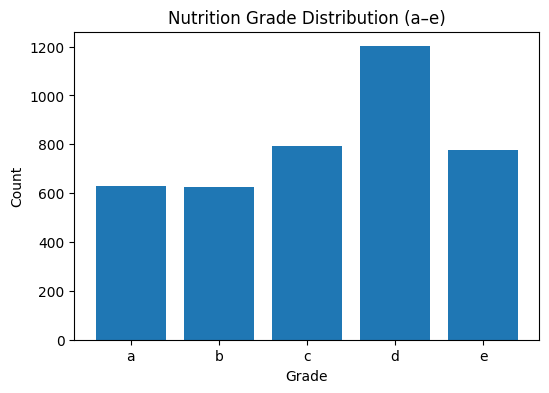

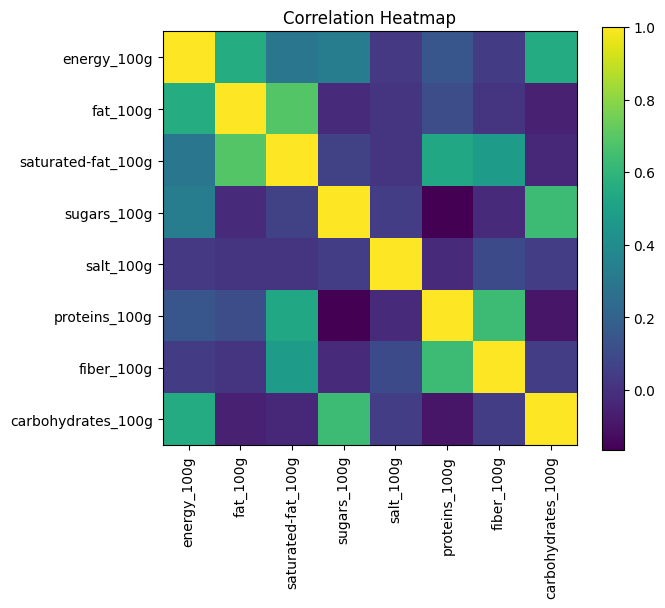

In [ ]:
import matplotlib.pyplot as plt


display(df[num_cols].describe().T)


counts = df["nutrition_grade_fr"].value_counts().reindex(list("abcde"))
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Nutrition Grade Distribution (a–e)")
plt.xlabel("Grade"); plt.ylabel("Count")
plt.show()


corr = df[num_cols].corr()
plt.figure(figsize=(7,6))
plt.imshow(corr.values)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

prep_scale = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

prep_noscale = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

models = {
    "Model 1 – Logistic Regression": Pipeline([
        ("prep", prep_scale),
        ("clf", LogisticRegression(max_iter=5000, multi_class="multinomial"))
    ]),
    "Model 2 – Decision Tree": Pipeline([
        ("prep", prep_noscale),
        ("clf", DecisionTreeClassifier(random_state=42))
    ]),
    "Model 3 – KNN (k=15)": Pipeline([
        ("prep", prep_scale),
        ("clf", KNeighborsClassifier(n_neighbors=15))
    ]),
    "Model 4 – Random Forest": Pipeline([
        ("prep", prep_noscale),
        ("clf", RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))
    ]),
    "Model 5 – Gradient Boosting": Pipeline([
        ("prep", prep_noscale),
        ("clf", GradientBoostingClassifier(random_state=42))
    ])
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

rows = []
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision (macro)": precision_score(y_test, pred, average="macro", zero_division=0),
        "Recall (macro)": recall_score(y_test, pred, average="macro", zero_division=0),
        "F1 (macro)": f1_score(y_test, pred, average="macro", zero_division=0),
    })

metrics_df = pd.DataFrame(rows).sort_values("F1 (macro)", ascending=False)
display(metrics_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Model,Accuracy,Precision (macro),Recall (macro),F1 (macro)
3,Model 4 – Random Forest,0.857320,0.859761,0.852089,0.854082
4,Model 5 – Gradient Boosting,0.851117,0.853061,0.845727,0.847409
1,Model 2 – Decision Tree,0.818859,0.820349,0.822874,0.820814
2,Model 3 – KNN (k=15),0.667494,0.666840,0.664205,0.658660
0,Model 1 – Logistic Regression,0.629032,0.622806,0.608169,0.606243
